<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_02_conceitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aspectos Básicos de Classificação


**Objetivo**: Prever uma *classe* (ou rótulo) associado com uma amostra contendo um determinado número de *atributos* conhecidos.

**Estratégia**: Utilizar dados contendo a classe de um conjunto de amostras com os respectivos atributos para ajustar os parâmetros ("treinar") de um algoritmo de classificação.

#1) Importação dos Dados

Inicialmente, deve-se analisar os dados e verificar se existem valores *categóricos* (ou seja, se é necessário aplicar uma etapa de codificação) ou *valores faltantes*


**Exemplo:** Classificação de cogumelos em comestíveis/tóxicos de acordo com atributos físicos.

In [ ]:
import pandas as pd #Importando a biblioteca pandas (manipulação de dados)

#url = 'https://drive.google.com/uc?id=133OqgqL7kRtBWNP01hzDFD2eRC5abV-H' #link para o arquivo de dados no Google Drive
url= 'https://drive.google.com/uc?id=133OqgqL7kRtBWNP01hzDFD2eRC5abV-H'
#Esta é uma versão reduzida do dataset disponível em https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

df = pd.read_csv(url) #Lendo o arquivo com dados e alocando na variável 'df' (DataFrame)
df.head(10) #Imprime as primeiras linhas

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,954,2,6,10,1.515569,1144,11,0.888450,1
1,409,6,4,5,0.473925,989,6,0.888450,0
2,972,6,4,5,0.703855,1699,6,0.943195,0
3,518,6,0,5,0.394346,405,11,1.804273,0
4,789,6,5,7,0.577379,950,8,1.804273,1
5,692,2,5,11,1.081859,1131,7,0.943195,0
6,1244,6,5,11,0.699876,1636,6,0.888450,1
7,475,2,5,10,0.553505,805,6,0.888450,0
8,261,6,0,1,0.736539,443,1,0.943195,1
9,257,6,4,1,0.828055,924,12,0.943195,0


Analisando o arquivo, vemos que existem os seguintes dados:

- 8 atributos de entrada, todos numéricos

- 1 rótulo de saída, binário (0 = comestível, 1 = tóxico)

Agora, podemos verificar se existem dados faltantes:

In [ ]:
#Verificando se existem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     5000 non-null   int64  
 1   cap-shape        5000 non-null   int64  
 2   gill-attachment  5000 non-null   int64  
 3   gill-color       5000 non-null   int64  
 4   stem-height      5000 non-null   float64
 5   stem-width       5000 non-null   int64  
 6   stem-color       5000 non-null   int64  
 7   season           5000 non-null   float64
 8   class            5000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 351.7 KB


Como não existem dados faltantes, podemos passar para a próxima etapa.

De modo geral, os algoritmos de classificação trabalham com os dados armazenados da seguinte forma:

- Uma matriz **X**, com dimensão *m × n*, contendo os atributos de entrada, onde *m* é o número de amostras no dataset e *n* o número de atributos

- Um vetor **y** com dimensão *m* contendo o rótulo de cada amostra.


In [ ]:
#Armazendo uma matriz X com todos os atributos de entrada
X = df.iloc[:,0:8]#não inclui a 8

#Armazendo um vetor y com os rótulos de saída
y = df.iloc[:,8]

#Transformando os dados anteriores em variáveis do tipo "array" para permitir manipulação numérica
X_array = X.values
y_array = y.values
#print(X_array)
#print(y_array)


#2) Visualizando os dados

Antes de avançar com o código, pode ser interessante contruir alguns gráficos para visualizar os dados, permitindo uma análise prévia dos resultados. Algumas informações que podem ser relevantes:

1) Existe uma fronteira de separação nítida entre as classes? Se existir, essa fronteira é linear?

2) Os valores dos atributos estão homogeneamente distribuídas ou estão concentradas em faixas de valores específicas?

3) A distribuição das amostras nas diferentes classes é homogênea ou existe a predominância de uma classe?

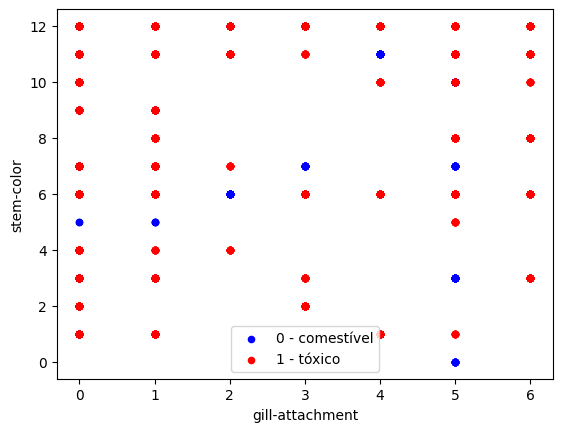

In [ ]:
#Construindo um gráfico de dispersão para visualizar os pontos
#Plotar uma variável em função da outra e indicar qual classe de cada ponto
import matplotlib.pyplot as plt #Biblioteca gráfica
var1 = 2  #Escolhendo um dos atributos a serem graficados (entre 0 e 7) - eixo x
var2 = 6 #Escolhendo o outro atributoa a ser graficado (entre 0 e 7) - eixo y
plt.scatter(X_array[y_array == 0, var1], X_array[y_array == 0, var2], c='blue', s=20, label='0 - comestível') #Fazendo o gráfico e atribuindo a cor azul se y=0
#Argumentos: 1a posição - eixo x, 2a posição - eixo y, c = cor, s = tamanho, label = legenda
plt.scatter(X_array[y_array == 1, var1], X_array[y_array == 1, var2], c='red', s=20, label='1 - tóxico') #Fazendo o gráfico e atribuindo a cor vermelho se y=1
plt.xlabel(X.columns[var1]) #Nomeando o eixo x de acordo com os nomes definidos na tabela de dados
plt.ylabel(X.columns[var2]) #Nomeando o eixo y de acordo com os nomes definidos na tabela de dados
plt.legend() #Mostrar legenda
plt.show() #Mostrar gráfico

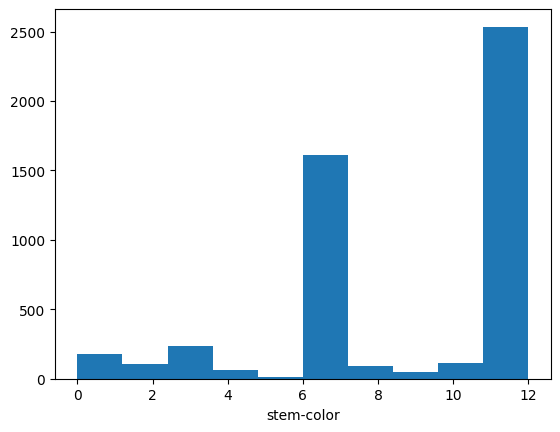

In [ ]:
#Gráficos de histogramas: Informam a distribuição do número de amostras de acordo com a classe/atributos
#plt.hist(y_array) #Distribuição de amostras por classe
var3 = 6 #Escolhendo um dos atributos a serem graficados (entre 0 e 7)
plt.hist(X_array[:,var3]);#Distribuição de acordo com o atributo na posição var3
plt.xlabel(X.columns[var3]) #Nomeando o eixo x de acordo com os nomes definidos na tabela de dados
plt.show() #Mostrar gráfico


#3) Normalização dos Dados

Mesmo os dados estando na forma numérica e sem dados faltantes, existe um outro potencial problema: eles possuem escalas de valores muito distinas. Isto pode levar a dificuldades numéricas!

Para resolver este problema, podemos **normalizar** os dados para deixar todos eles em uma escala específica, por exemplo, entre 0 e 1.

In [ ]:
#Utilizando a função MinMaxScaler para normalizar os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) #definindo o intervalo entre 0 e 1
X_array_norm = scaler.fit_transform(X_array) #Normalizando os dados da matriz X e alocando em uma nova variável
#Os dados do vetor y já estão na escala correta!
print(X_array_norm)

[[0.50292087 0.33333333 1.         ... 0.32080763 0.91666667 0.48459557]
 [0.21348911 1.         0.66666667 ... 0.27734156 0.5        0.48459557]
 [0.51248008 1.         0.66666667 ... 0.4764442  0.5        0.51540443]
 ...
 [0.23844928 1.         0.66666667 ... 0.31015143 0.5        0.51540443]
 [0.39245884 1.         1.         ... 0.43438026 0.91666667 0.51540443]
 [0.64630908 1.         1.         ... 0.54234436 0.91666667 0.48459557]]


#4) Grupos de Teste e de Treinamento

Uma questão fundamental em aprendizagem de máquina é:

1) Qual a capacidade do modelo fazer previsões da classe de novas amostras?

2) Considerando as amostras classificadas de forma incorreta, existe alguma tendência nesse erro?

Para responder estas perguntas, precisamos testar o algoritmo após os parâmetros terem sido ajustados. Porém, se usarmos os mesmos dados para ajustar os parâmetros e para testá-lo, a resposta será altamente enviesada.



---



**Solução**: Ajustar o algoritmo usando parte dos dados e deixar outra parte 'reservada' para testar o desempenho.



---



Com base no conjunto de dados originais, vamos criar dois subconjuntos:

1) **Conjunto de treinamento** (~80% das amostras): utilizado para o ajuste dos parâmetros do modelo;

2) **Conjunto de teste** (~20% das amostras): utilizado para testar o modelo. Estes dados não devem ser utilizados durante as demais etapas!


Além disso, em muitos casos pode ser conveniente definir um terceiro subconjunto:

3) **Conjunto de validação** (10 - 15% das amostras): utilizado para comparar o desempenho de diferentes algoritmos e para auxiliar na escolha de parâmetros do algoritmo.






In [ ]:
#Dividindo os dados em teste/treinamento usando a função train_test_split
from sklearn.model_selection import train_test_split
test_group_size = 0.2 #Fração dos dados no grupo de teste
seed = 667 #número aleatório utilizado como semente para o algoritmo de divisão. Manter esse valor fixo garante que a divisão será sempre igual
X_train, X_test, y_train, y_test = train_test_split(X_array_norm, y_array, test_size=test_group_size, random_state=seed)
#Obs.: Se for desejado criar mais um grupo de validação, pode-se repetir a operação dividindo o grupo de treino em dois grupos (validação/treino)
print(X_train.shape)
print(X_test.shape)

(4000, 8)
(1000, 8)


#5) Treinamento do Algoritmo de Classificação

Com os dados separados, podemos agora ajustar o algoritmo usando os dados de treino. Após, podemos utilizar os atributos de entrada dos dados no conjunto de teste e determinar a classe prevista para essas amostra.

Posteriormente, a diferença entre essas classes previstas e as classes reais será utilizada para avaliar o desempenho do algoritmo.

**Obs.:** Por enquanto, não iremos focar nos diferentes algoritmos de classificação. Para ilustrar, será utilizado o KNN.

In [ ]:
#Importando o classificador KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5) #criando uma variável para armazenar o modelo e definindo o número de vizinhos igual a 5
clf = model.fit(X_train,y_train) #ajustando o modelo com base nos dados de treinamento
predictions = model.predict(X_test) #prevendo a classe de cada amostra no conjunto de teste
print(predictions - y_test) #subtraindo o valor previsto do real - 0 = previsão correta, 1 ou -1 = previsão errada


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  1
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

#6) Métricas de Análise



##6.1) *Confusion Matrix*



Por último, precisamos **mensurar** o nível de desempenho do algoritmo. Para o caso de algoritmos de classificação binária, é conveniente definir as seguintes quantidades:

- **Verdadeiros Positivos (TP)**: Valores da classe 1 preditos de forma correta;
- **Verdadeiros Negativos (TN)**:Valores da classe 0 preditos de forma correta;
- **Falsos Positivos (FP)**: Valores da classe 0 preditos como sendo da classe 1;
- **Falsos Negativos (FN)**:Valores da classe 1 preditos como sendo da classe 0.

A soma de todos estes conjuntos deve ser igual ao número total de pontos utilizados no grupo de teste.

Estes valores costumam ser representados na forma de uma matriz, chamada de **matriz de confusão** ou **matriz de erro** (*confusion matrix*):




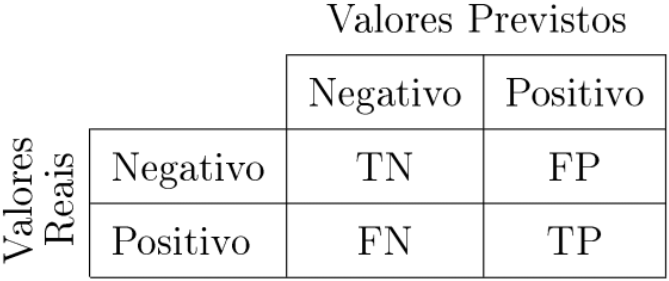

[[411  19]
 [ 21 549]]


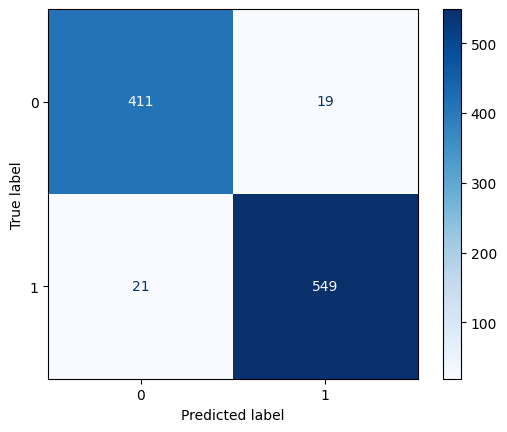

In [ ]:
#Construindo a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #Pacote para visualização da cm

cm = confusion_matrix(y_test, predictions) #matriz gerada com base nos valores reais (y_test) e nos previstos (predictions)
print(cm)

#plotando a confusion matrix de maneira visualmente mais agradável!
ConfusionMatrixDisplay(cm).plot(cmap='Blues');


##6.2) Acurária

Com base nos valores utilizados na *confusion matrix*, podemos definir diversas métricas quantitativas para avaliar o desempenho do algoritmo.


Uma lista com diveras métricas possíveis de serem avaliadas pode ser encontrada aqui https://en.wikipedia.org/wiki/Template:Diagnostic_testing_diagram


Por enquanto, vamos focar em algumas das mais importantes, a começar pela *acurácia*:

**Acurácia**: Razão entre a quantidade total de amostras classificadas corretamente e a quantidade total de amostras

Acurácia = $\dfrac{[TP] + [TN]}{[TP] + [TN] + [FP] + [FN]}$


In [ ]:
#Cálculando a acurácia usando a função accuracy_score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print(acc)

0.96


##6.3) Precisão e Recall

A acurácia é uma métrica global de análise, ela não diferencia o tipo de erro de classificação.

Em muitas situações, é fundamental garantir que a taxa de falsos positivos ou falsos negativos seja minimizada.

Exemplo dos cogumelos:

*Falso positivo*: cogumelo comestível previsto como tóxico

*Falso negativo*: cogumelo tóxico previsto como comestível


Existem métricas que diferenciam o tipo de erro, por exemplo, a precisão, recall e especificidade:



---



**Precisão:** Habilidade do algoritmo não classificar como positivo uma amostra que na verdade é negativa (fração de positivos que de fato são positivos):

Precisão = $\dfrac{[TP]}{[TP] + [FP]}$

Importante quando FALSO POSITIVO é muito prejudicial.

---



**Recall** (revocação ou sensitividade): Habilidade de classificar corretamente uma amostra positiva (fração de positivos classificados corretamente):

Recall = $\dfrac{[TP]}{[TP] + [FN]}$

Importante quando um FALSO NEGATIVO pode gerar consequências graves.


---


**Especificidade**: Capacidade de identificar corretamente os casos negativos (fração de negativos que de fato são negativos):


Especificidade = $\dfrac{[TN]}{[TN] + [FP]}$

Importante quando o custo de um FALSO POSITIVO é alto.


In [ ]:
#Calculando a precisão e o recall para as amostras
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prc = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
print('precision =' ,prc, 'recall = ', rec)


precision = 0.9665492957746479 recall =  0.9631578947368421


##6.4) F-beta score





Precisão e recall são úteis quando existe uma clara distinção entre qual tipo de erro é pior. Em muitos casos, podemos fazer uma *média* entre essas duas quantidades.

Entre as médias mais utilizadas está o F-beta, que representa uma média harmônica entre precisão e recall, calculado como:

$$
F_\beta = \frac{(1+\beta^2)[TP]}{(1+\beta^2)[TP] + [FP] + \beta^2[FN]}
$$

O parâmetro β representa a razão entre a importância do recall em relação à precisão (ex, β=2 faz com que o recall tenha um peso duas vezes maior que a precisão, β=0.1 faz a precisão com um peso 10 vezes maior que o recall).


In [ ]:
#Calculando o parâmetro f-beta
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, predictions, beta=2) #beta=1, também chamado de f1-score
print(fbeta)

0.9638342696629213


#7) Classificação multiclasse

No exemplo anterior, os dados foram classificados somente em duas classes (0 ou 1). Porém, podemos ter casos onde as amostras podem pertencer a mais de duas classes.

As etapas para aplicação do algoritmo de classificação são iguais ao utilizando anteriormente para o caso binário.

Alguns algoritmos de classificação naturalmente suportam múltiplas classes, enquanto outros podem ser utilizados para multiclasse empregando estratégias de transformação em uma série de classificações binárias, sendo as mais comuns:



---



**One-vs-rest**:  um classificador é treinado para cada classe, tratada como a 'positiva', sendo todas as demais tratadas como 'negativa'. Para ilustrar, suponha um caso com quatro classes: cl1, cl2, cl3 e cl4. As classificações binárias realizada seriam:

Classificação 1: cl1 vs (cl2, cl3 e cl4)

Classificação 2: cl2 vs (cl1, cl3 e cl4)

Classificação 3: cl3 vs (cl1, cl2 e cl4)

Classificação 4: cl4 vs (cl1, cl2 e cl3)

---


**One-vs-one**: O conjunto de dados é dividido em subconjuntos contendo amostras de somente duas classes. O algoritmo é então treinado para cada um desses subconjuntos. Supondo o mesmo exemplo anterior, teríamos as seguintes classificações binárias:

Classificação 1: cl1 vs cl2

Classificação 2: cl1 vs cl3

Classificação 3: cl1 vs cl4

Classificação 4: cl2 vs cl3

Classificação 5: cl2 vs cl4

Classificação 6: cl3 vs cl4



---


Veja https://scikit-learn.org/stable/modules/multiclass.html para uma lista dos algoritmos que suportam cada abordagem!

Considere um exemplo onde amostras de vinho são classificada em uma escada de qualidade indo de 3 até 8, de acordo com 11 parâmetros físico-químicos.

In [ ]:
url_multi = 'https://drive.google.com/uc?id=1IzflRz_Jr3GPo7uxt2epwfdg1jzRKKpz' #link para o arquivo de dados no Google Drive
#https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

df_multi = pd.read_csv(url_multi) #Lendo o arquivo com dados e alocando na variável 'df' (DataFrame)
df_multi.head(10) #Imprime as primeiras linhas


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [ ]:
#Verificando se existem dados faltantes
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
###Aplicando as mesmas etapas descritas anteriormente para classificação binária:

#Armazendo uma matriz X_multi com todos os atributos de entrada
X_multi = df_multi.iloc[:,0:11]

#Armazendo um vetor y_multi com os rótulos de saída
y_multi = df_multi.iloc[:,11]

#Transformando os dados anteriores em variáveis do tipo "array" para permitir manipulação numérica
X_multi_array = X_multi.values
y_multi_array = y_multi.values

#Normalizando os dados
X_multi_array_norm = scaler.fit_transform(X_multi_array) #Usando a mesma escala de 0 a 1 definida previamente

#Dividindo em grupo de teste e treinamento
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi_array_norm, y_multi_array, test_size=0.3, random_state=seed)

#Ajustando o modelo
model_multi =  KNeighborsClassifier(n_neighbors = 5) #Esse algoritmo suporta naturalmente múltiplas classes
clf_multi = model_multi.fit(X_multi_train,y_multi_train)

#Calculando os valores previstos para o grupo de teste
predictions_multi = model_multi.predict(X_multi_test)

##7.1) Métricas de análise para classificação multiclasse

Para avaliar o desempenho do algoritmo nesse caso, precisamos rever os conceitos de "verdadeiro/falso positivo/negativo", já que isto só faz sentido para um caso binário.




###7.1.1) *Confusion matrix* multiclasse

Considere um caso onde existam $n$ diferentes classes. Neste caso, a matriz de confusão será uma matriz $n \times n$, onde um elemento $a_{i,j}$ representa a quantidade de amostras da classe $i$ previstos como pertencentes à classe $j$. Por exemplo:

$a_{2,2}$ = quantidade de amostras da classe 2 previstos corretamente como sendo da classe 2

$a_{2,3}$ = quantidade de amostras da classe 2 previstos erroneamente como sendo da classe 3

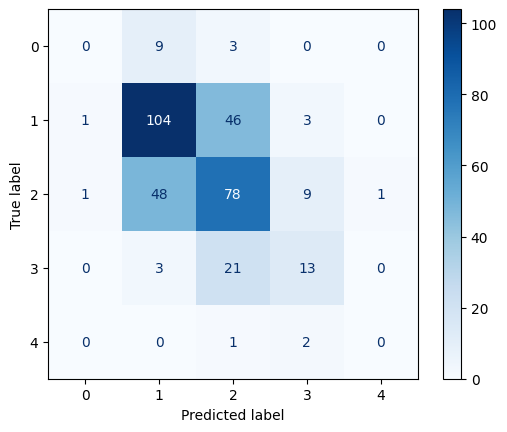

In [ ]:
#Confusion matrix para o caso multiclasse, onde existem 5 classes
cm_multi = confusion_matrix(y_multi_test, predictions_multi) #matriz gerada com base nos valores reais (y_multi_test) e nos previstos (predictions)
#print(cm_multi)

ConfusionMatrixDisplay(cm_multi).plot(cmap='Blues');

###7.1.2) Acurácia multiclasse

Neste caso, a acurácia é simplesmente calculada como sendo a razão entre as amostras previstas corretamente e o total de amostras:

**acurácia** = $\dfrac{\sum\limits_{i=1}^n a_{i,i}}{{\sum\limits_{i=1}^n \sum\limits_{j=1}^n a_{i,j}}}$

In [ ]:
#Cálculando a acurácia
acc_multi = accuracy_score(y_multi_test, predictions_multi)
print('acurácia = ', acc_multi)

acurácia =  0.5685131195335277


###7.1.3) Precisão, Recall e F-beta

Estes conceitos podem ser aplicados para cada classe individualmente.
Por exemplo, para a classe $i=3$ teríamos:

**verdadeiro positivo** = $a_{3,3}$

**verdadeiro negativo** = $\sum\limits_{i=1 \\ i \neq 3}^n a_{i,i}$ (valores de outras classes previstos corretamente)

**Falso positivo** = $\sum\limits_{i=1 \\ i \neq 3}^n a_{i,3}$ (valores de outras classes previstos como sendo da classe 3)

**Falso negativo** = $\sum\limits_{i=1 \\ i \neq 3}^n a_{3,i}$ (valores da classe 3 previstos como sendo de outras classes)

Após calcular o valor para todas as classes, pode-se fazer uma média entre os valores.

In [ ]:
prc_multi = precision_score(y_multi_test, predictions_multi, average='weighted')
#average = weighted faz uma média ponderada dos valores de acordo com o número de amostras em cada classe
rec_multi = recall_score(y_multi_test, predictions_multi, average='weighted')

#Calculando precisão, recall e f-1
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
fbeta_multi = fbeta_score(y_multi_test, predictions_multi, beta=1, average='weighted')
print('precisão =' ,prc_multi)
print('recall = ', rec_multi)
print('f1-score = ',  fbeta_multi)

precisão = 0.5457477323776961
recall =  0.5685131195335277
f1-score =  0.5553588410370273
